**Import Library**

In [5]:
import random
import calendar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, skew, ttest_ind
import warnings
warnings.filterwarnings('ignore')

**Loading Dataset**

In [26]:
df=pd.read_csv(r'D:\major project\fraudTrain.csv')

In [27]:
df.shape

(1296675, 23)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [29]:
df['is_fraud'].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [35]:
# drop column unnamed
df = df.drop(columns=['Unnamed: 0'])

In [36]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


We started by loading and understanding our dataset, which contains fraud detection information for the year 2019 and 2020. The dataset comprises over one million record and 22 columns in training dataset and half million record in test data.

**Data Cleaning**

In [37]:
df.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [38]:
df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [39]:
df = df.dropna()

In [40]:
df.shape

(1296675, 22)

**Converting dob,trans_date_trans_time column in train to datetime data type and creating new 'trans_date' column -**

In [41]:
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
df['trans_date']=df['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
df['trans_date']=pd.to_datetime(df['trans_date'])
# convert dob to datetime
df['dob']=pd.to_datetime(df['dob'])

### EDA Feature Engineering ###

**Categorical Variable Analysis**

In [42]:
df["is_fraud_cat"]=df.is_fraud.apply(lambda x: "T" if x==1 else "F")
df["is_fraud_cat"].astype("object")

0          F
1          F
2          F
3          F
4          F
          ..
1296670    F
1296671    F
1296672    F
1296673    F
1296674    F
Name: is_fraud_cat, Length: 1296675, dtype: object

In [43]:
df_cat=df.select_dtypes(include=['object'])

In [44]:
df[df_cat.columns]

,merchant,category,first,last,gender,street,city,state,job,trans_num,is_fraud_cat
0,"fraud_Rippin, Kub and Mann",misc_net,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,"Psychologist, counselling",0b242abb623afc578575680df30655b9,F
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,Special educational needs teacher,1f76529f8574734946361c461b024d99,F
2,fraud_Lind-Buckridge,entertainment,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,F
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,Patent attorney,6b849c168bdad6f867558c3793159a81,F
4,fraud_Keeling-Crist,misc_pos,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,F
...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,UT,Geoscientist,440b587732da4dc1a6395aba5fb41669,F
1296671,fraud_Abernathy and Sons,food_dining,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,MD,"Production assistant, television",278000d2e0d2277d1de2f890067dcc0a,F
1296672,fraud_Stiedemann Ltd,food_dining,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,NM,Naval architect,483f52fe67fabef353d552c1e662974c,F
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,Volunteer coordinator,d667cdcbadaaed3da3f4020e83591c83,F


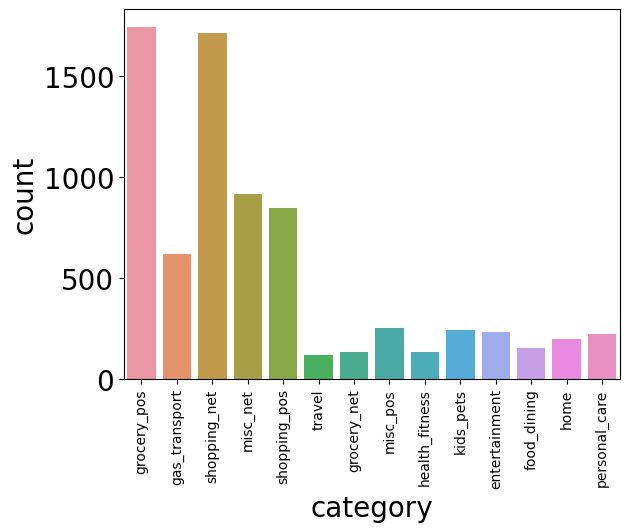

In [50]:
sns.countplot(data=df[df['is_fraud_cat'] == "T"], x='category')
plt.xticks(rotation=90,fontsize=10)
plt.show()

**Insight**- Most frauds occured in categories of shopping_net and grocery_pos

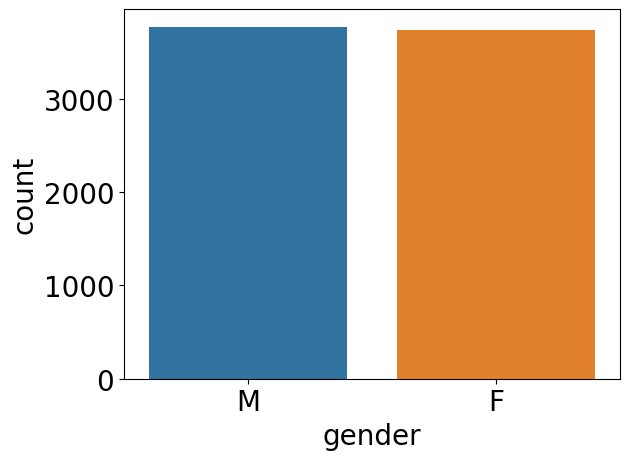

In [51]:
sns.countplot(data=df[df['is_fraud_cat']=="T"],x='gender') 
plt.show()

**Insight** - 
Although more cases of fraud happened with female customers, the number is almost the same for both Males and Females

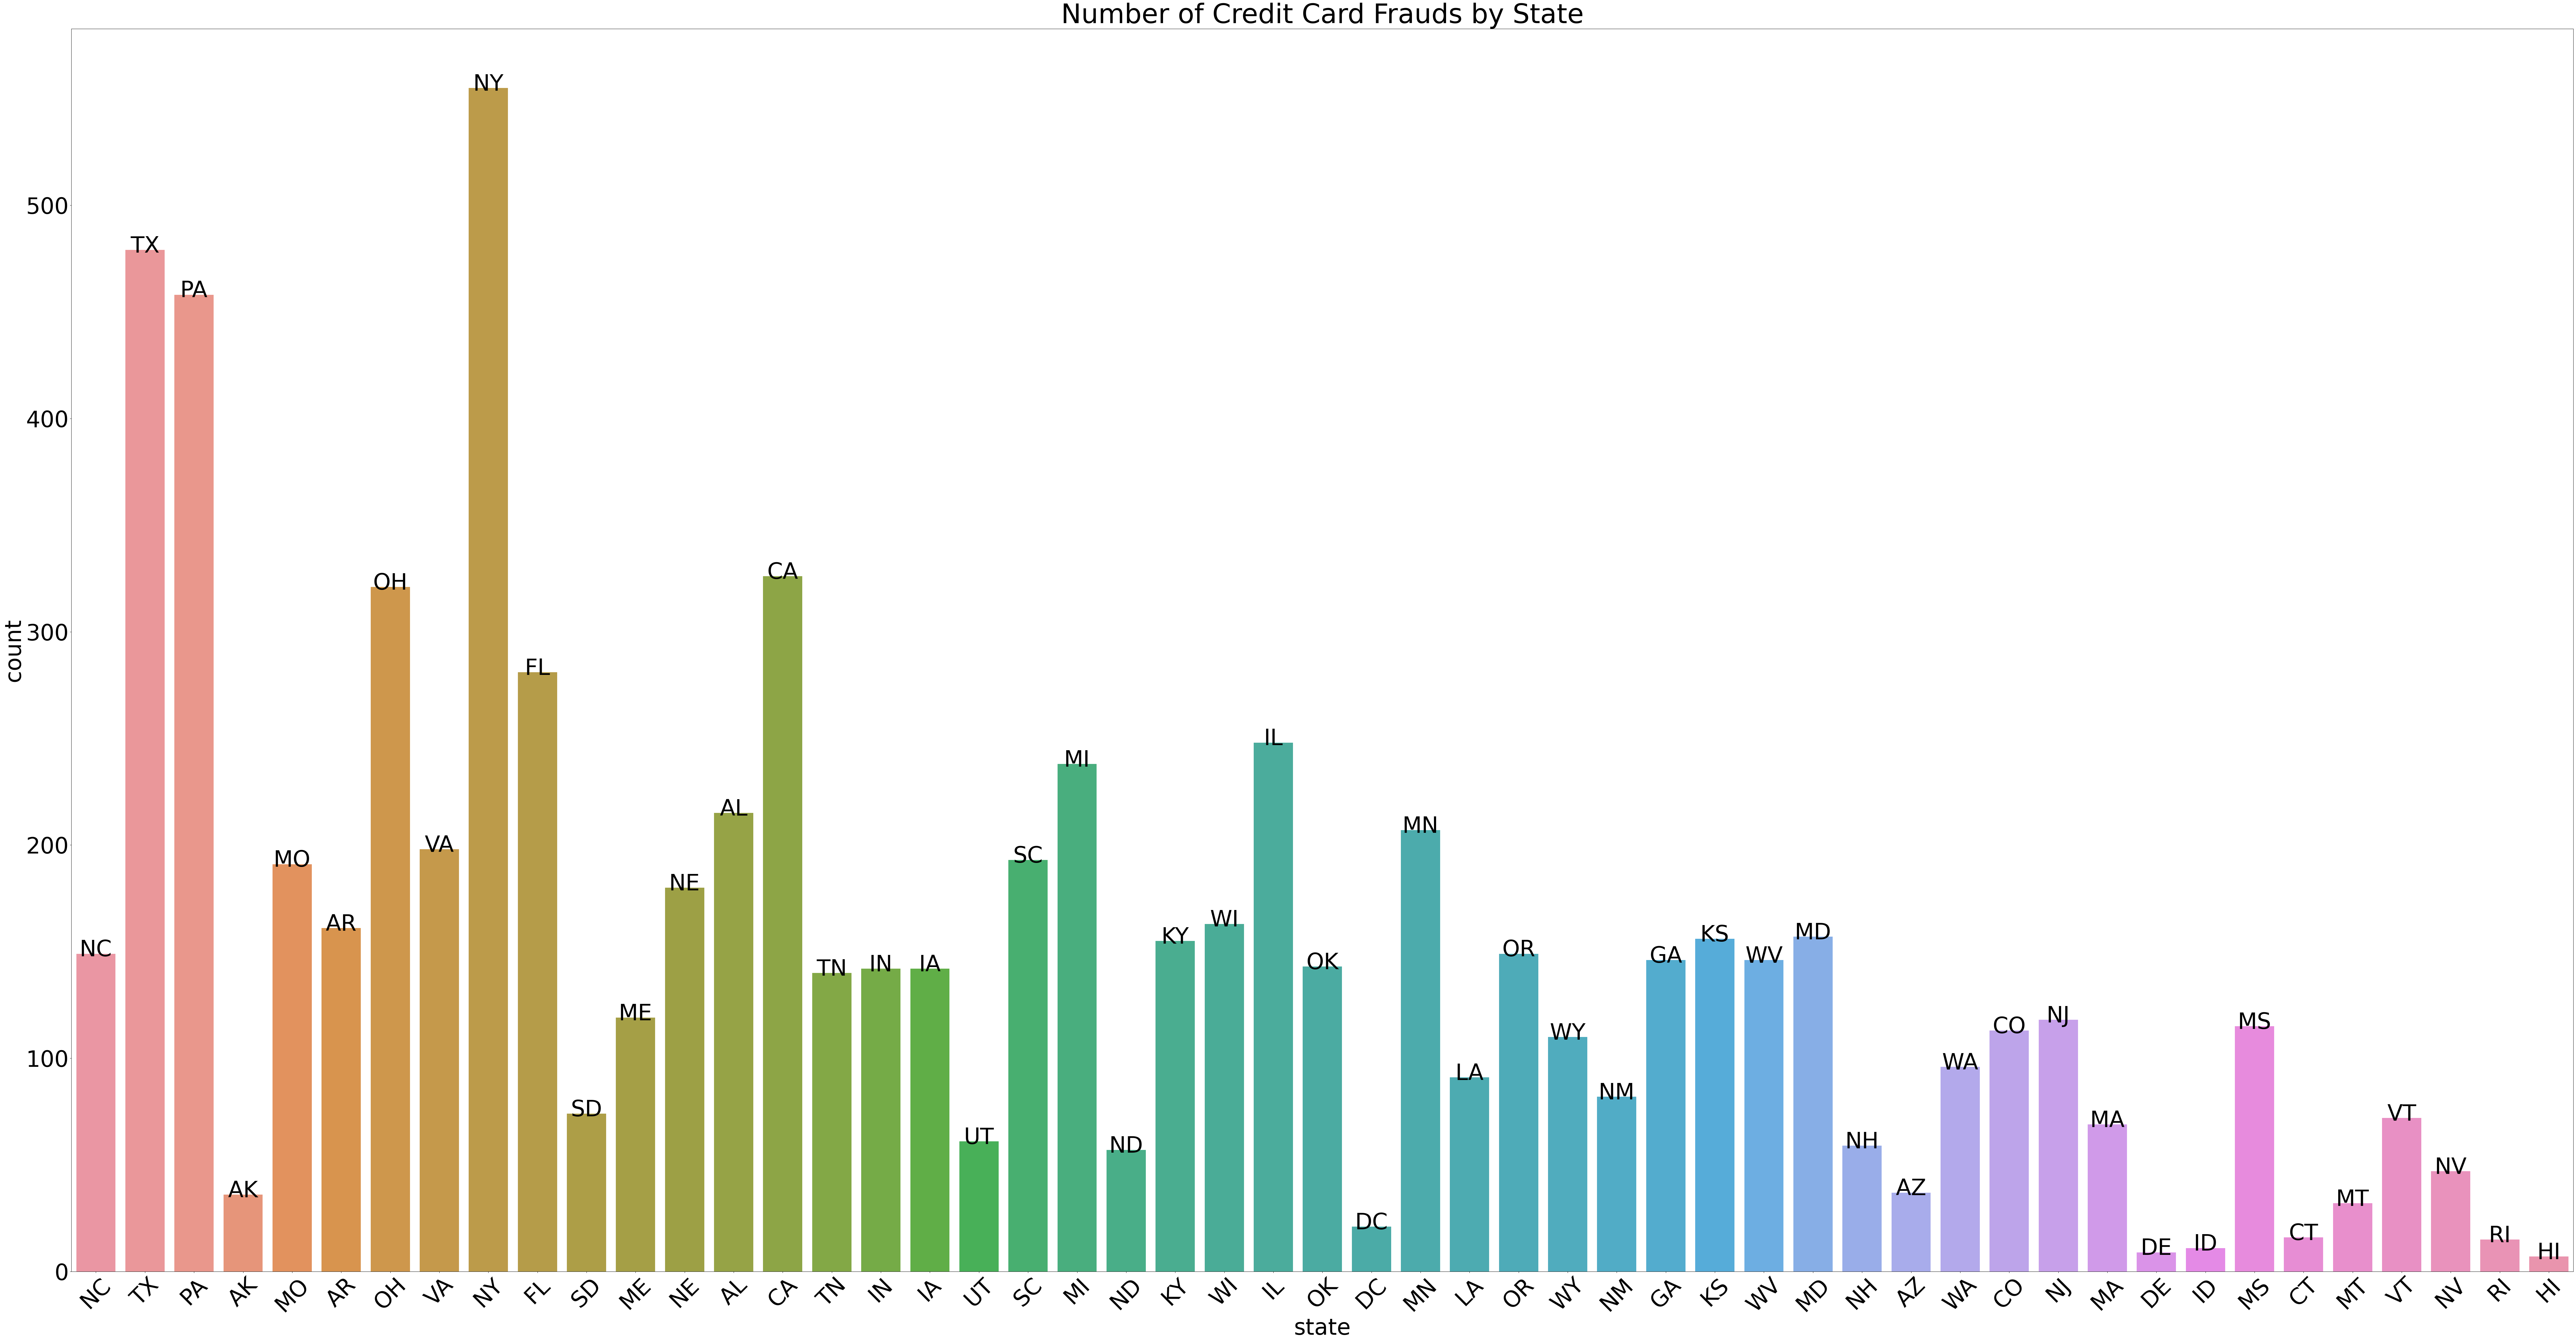

In [55]:
fig, ax = plt.subplots(figsize=(120,60))
plt.rcParams.update({'font.size': 60})
sns.countplot(data=df[df['is_fraud_cat']=="T"],x='state')
plt.xticks(rotation=45)
for p, label in zip(ax.patches, df[df['is_fraud_cat'] == "T"]['state'].unique()):
    height = p.get_height()
    ax.annotate(label, (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


# for p, label in zip(ax.patches, df["state"].value_counts().index):
#     ax.annotate(label, (p.get_x(), p.get_height()+0.15))
plt.title("Number of Credit Card Frauds by State")
plt.show()

**Insight** - States NY, TX and PA report the most number of credit card frauds

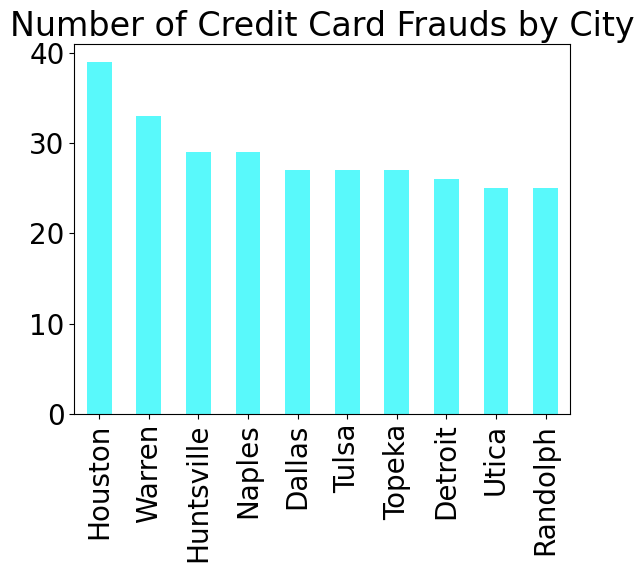

In [53]:
def randomcolor():
    r = random.random()
    b = random.random()
    g = random.random()
    rgb = [r,g,b]
    return rgb
plt.rcParams.update({'font.size': 20})
df[df['is_fraud_cat']=="T"]["city"].value_counts(sort=True,ascending=False).head(10).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by City")
plt.show()

**Insight** - Warren,Houston and Naples report the most frauds city wise.

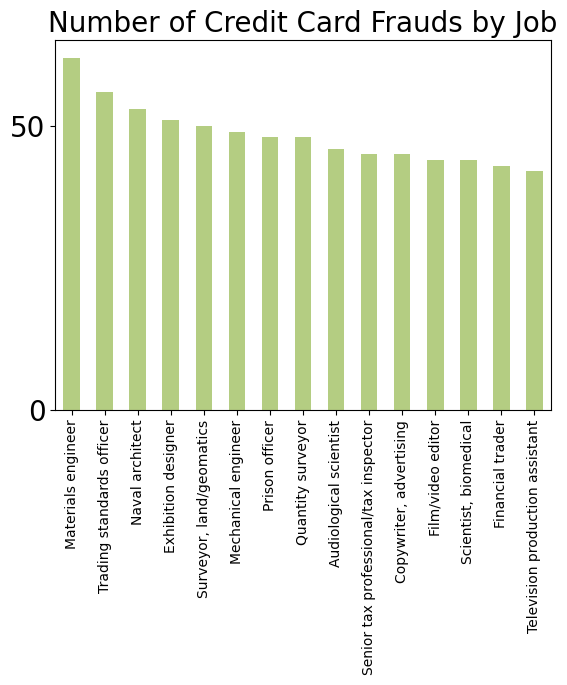

In [60]:
df[df['is_fraud_cat']=="T"]["job"].value_counts(sort=True,ascending=False).head(15).plot(kind="bar",color=randomcolor())
plt.title("Number of Credit Card Frauds by Job",fontsize=20)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=20)
plt.show()

**Insight** - Most frauds occured in jobs of Matrerials engineer followed by Trading standards officer and naval architect

### Numerical Variable Analysis ###

checking the spread & skewness of all numerical variables

In [61]:
del df['is_fraud_cat']

In [62]:
#finding numerical columns
testnum= df.select_dtypes(include=np.number)
df[testnum.columns]

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...
1296670,30263540414123,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0
1296671,6011149206456997,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0
1296672,3514865930894695,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0
1296673,2720012583106919,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0


**Inference** - Most transactions are limited within a very small bracket, although transactions of large sums are very much present, which are likely to be fraud transactions.

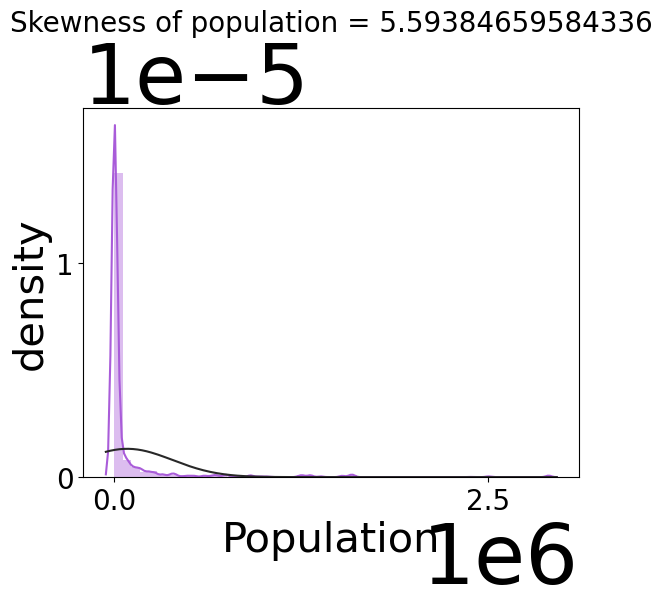

In [71]:
skewness = str(skew(df['city_pop']))
sns.distplot(df['city_pop'],fit = norm,color = randomcolor())
plt.title("Skewness of population"+" = "+skewness,fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Population",fontsize=30)
plt.ylabel("density",fontsize=30)
plt.show()

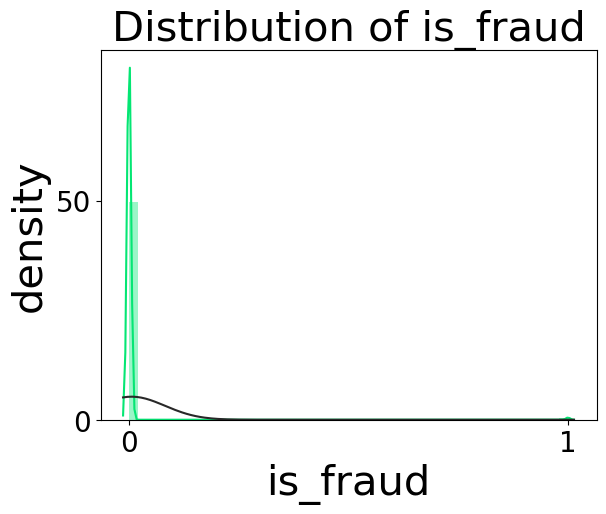

In [75]:
sns.distplot(df['is_fraud'],fit = norm,color = randomcolor())
plt.title("Distribution of is_fraud",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("is_fraud",fontsize=30)
plt.ylabel("density",fontsize=30)
plt.show()

Certain numerical columns are not needed for modeling and hence can be removed.

Moreover,a lot of the data is highly skewed.

one insight is that proportion of non fraud transactions are much much larger than fraud transactions so we are looking at an imbalanced dataset.

In [76]:
df.drop(['cc_num','merchant','first','last','street','zip','trans_num','unix_time'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

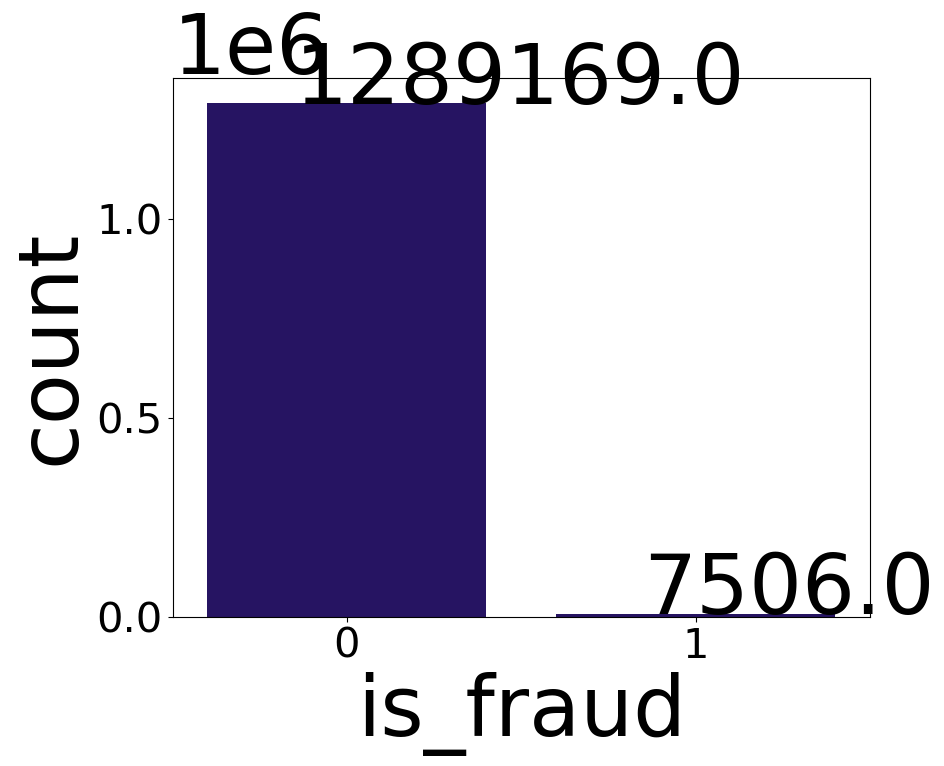

In [81]:
plt.figure(figsize=(9,7))
ax = sns.countplot(x="is_fraud", data=df,color=randomcolor())
for p in ax.patches:
     ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

**Insight** -only around 7506 entries represent fraud transactions out of nearly 1.2 million entries, hence we are looking at an imbalanced dataset.

creating age variable from transaction dates and DOB.

In [82]:
df["age"] = df["trans_date"]-df["dob"]
df["age"]=df["age"].astype('timedelta64[Y]')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

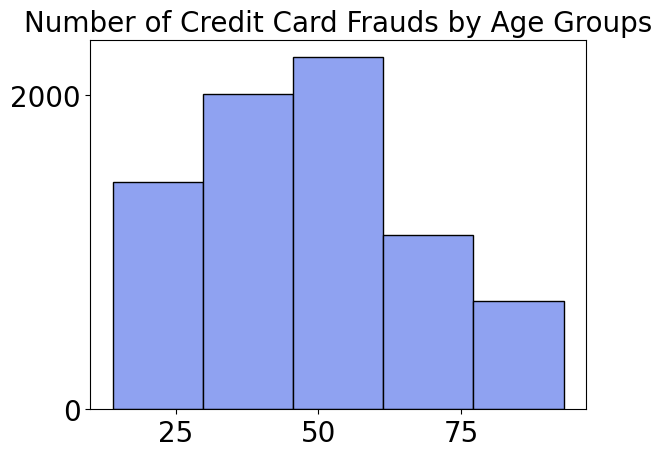

In [86]:
fraud=df[df["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.age, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by Age Groups",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

most frauds occur with age group of 30 to 60

### creating transacation month and transaction year columns

In [103]:
df['trans_month'] = pd.DatetimeIndex(df['trans_date']).month
df['trans_year'] = pd.DatetimeIndex(df['trans_date']).year
df['Month_name'] = df['trans_month'].apply(lambda x: calendar.month_abbr[x])

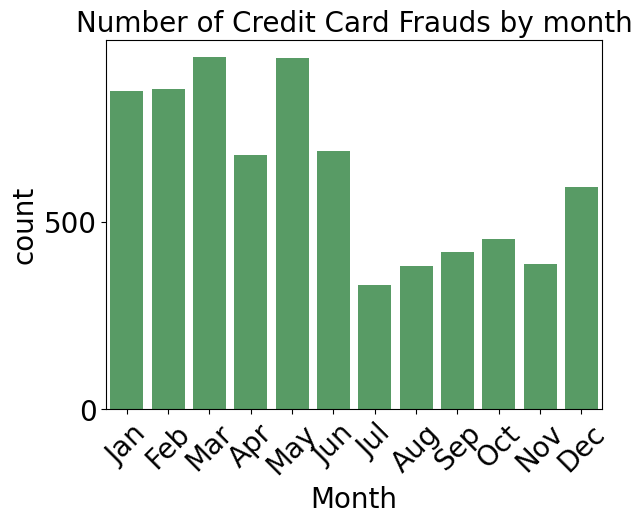

In [104]:
sns.countplot(data=df[df["is_fraud"]==1],x='Month_name',color=randomcolor())
plt.title("Number of Credit Card Frauds by month",fontsize=20)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Month",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()
del df['Month_name']

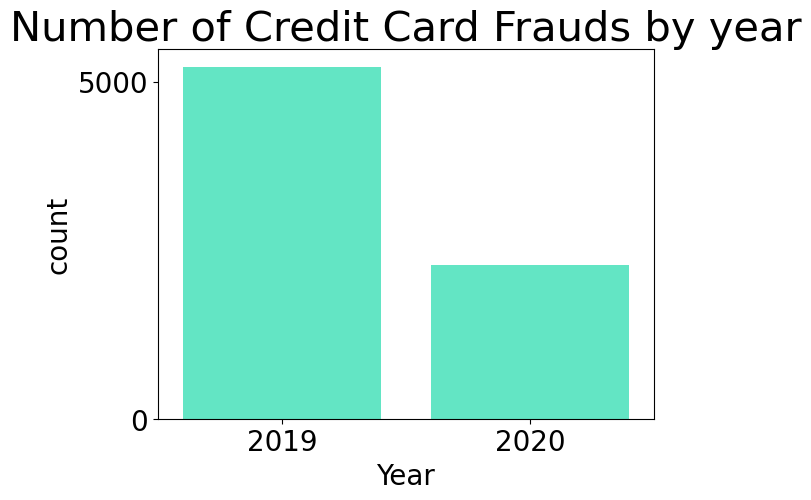

In [106]:
sns.countplot(data=df[df["is_fraud"]==1],x='trans_year',color=randomcolor())
plt.title("Number of Credit Card Frauds by year",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.ylabel("count",fontsize=20)
plt.show()

Finding distance from customer location to merchant location in degrees latitude and degrees longitude

In [107]:
df['latitudinal_distance'] = abs(round(df['merch_lat']-df['lat'],3))
df['longitudinal_distance'] = abs(round(df['merch_long']-df['long'],3))

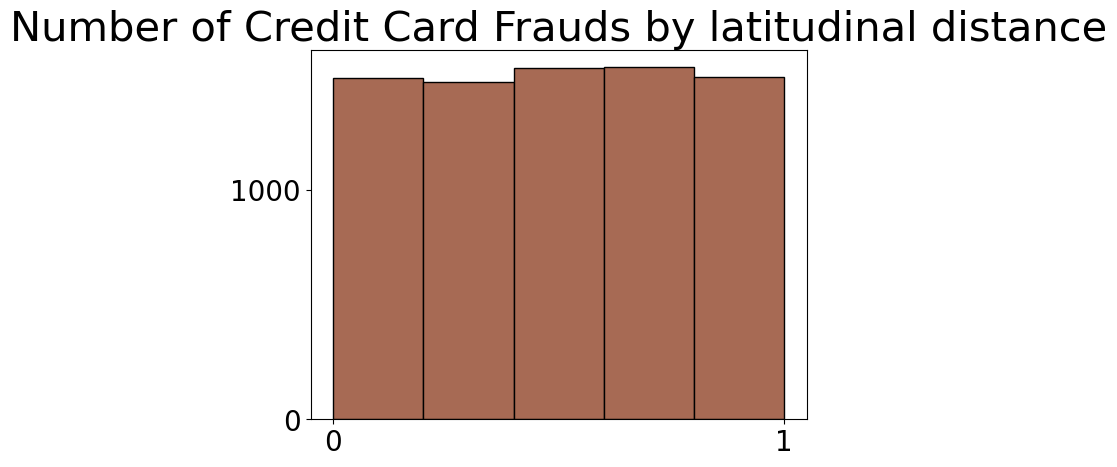

In [113]:
fraud = df[df["is_fraud"]==1]
fig, ax = plt.subplots()
ax.hist(fraud.latitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by latitudinal distance",fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

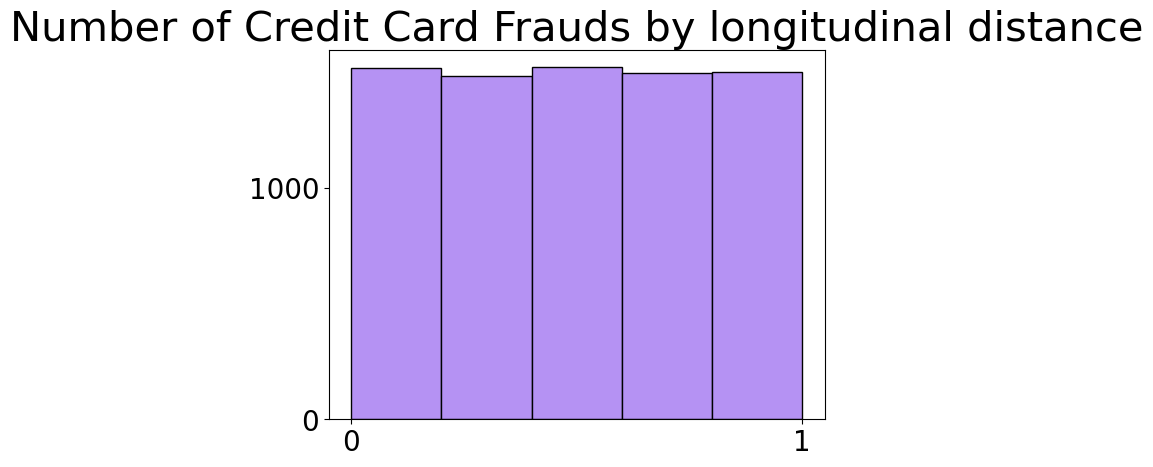

In [111]:
fig, ax = plt.subplots()
ax.hist(fraud.longitudinal_distance, edgecolor = "black", bins = 5, color=randomcolor())
plt.title("Number of Credit Card Frauds by longitudinal distance",fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 20 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   trans_date_trans_time  1296675 non-null  datetime64[ns]
 1   category               1296675 non-null  object        
 2   amt                    1296675 non-null  float64       
 3   gender                 1296675 non-null  object        
 4   city                   1296675 non-null  object        
 5   state                  1296675 non-null  object        
 6   lat                    1296675 non-null  float64       
 7   long                   1296675 non-null  float64       
 8   city_pop               1296675 non-null  int64         
 9   job                    1296675 non-null  object        
 10  dob                    1296675 non-null  datetime64[ns]
 11  merch_lat              1296675 non-null  float64       
 12  merch_long             12966

changing gender values to binary values

In [115]:
df.gender.value_counts()

F    709863
M    586812
Name: gender, dtype: int64

In [116]:
df.gender=df.gender.apply(lambda x: 1 if x=="M" else 0)
df.gender.value_counts()

0    709863
1    586812
Name: gender, dtype: int64

Dropping final set of variables not useful for model building

**Hypothesis testing** for amount

In [117]:
fraudulent_transactions = df[df["is_fraud"] == 1] 
legitimate_transactions = df[df["is_fraud"] == 0]

In [118]:
fraud_transactions_mean = fraudulent_transactions["amt"].mean() 
fraud_transactions_variance = fraudulent_transactions["amt"].var() 
legitimate_transactions_mean = legitimate_transactions["amt"].mean() 
legitimate_transactions_variance = legitimate_transactions["amt"].var()

In [119]:
t_statistic, p_value = ttest_ind(fraudulent_transactions["amt"], legitimate_transactions["amt"])

In [120]:
if p_value < 0.05:
    print("We reject the null hypothesis. There is evidence to suggest that the average amount of fraudulent transactions is different from the average amount of legitimate transactions.") 
else: 
    print("We fail to reject the null hypothesis. There is not enough evidence to suggest that the average amount of fraudulent transactions is different from the average amount of legitimate transactions.")

We reject the null hypothesis. There is evidence to suggest that the average amount of fraudulent transactions is different from the average amount of legitimate transactions.


In [124]:
drop_cols = ['trans_date_trans_time','lat','long','job','dob','merch_lat','merch_long','trans_date','state']
df=df.drop(drop_cols,axis=1)
df.info()

KeyError: "['trans_date_trans_time', 'lat', 'long', 'job', 'dob', 'merch_lat', 'merch_long', 'trans_date', 'state'] not found in axis"

In [126]:
df = df.drop(['city'],axis=1)

,amt,gender,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,category_food_dining,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,3495,0,30.0,1,2019,0.068,0.870,0,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,149,0,40.0,1,2019,0.271,0.024,0,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,4154,0,56.0,1,2019,0.970,0.108,0,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,1939,0,51.0,1,2019,0.804,0.447,0,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,99,0,32.0,1,2019,0.254,0.830,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,1,258,0,58.0,6,2020,0.876,0.787,0,...,0,0,0,0,0,0,0,0,0,0
1296671,51.70,1,100,0,40.0,6,2020,0.360,0.736,1,...,0,0,0,0,0,0,0,0,0,0
1296672,105.93,1,899,0,52.0,6,2020,0.680,0.688,1,...,0,0,0,0,0,0,0,0,0,0
1296673,74.90,1,1126,0,39.0,6,2020,0.564,0.700,1,...,0,0,0,0,0,0,0,0,0,0


In [127]:
df = pd.get_dummies(df,columns=['category'],drop_first=True)
df.info()

KeyError: "None of [Index(['category'], dtype='object')] are in the [columns]"

In [9]:
df.head()

,amt,gender,city,city_pop,is_fraud,age,trans_month,trans_year,latitudinal_distance,longitudinal_distance,...,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,Moravian Falls,3495,0,30.0,1,2019,0.068,0.870,...,0,0,0,0,1,0,0,0,0,0
1,107.23,0,Orient,149,0,40.0,1,2019,0.271,0.024,...,1,0,0,0,0,0,0,0,0,0
2,220.11,1,Malad City,4154,0,56.0,1,2019,0.970,0.108,...,0,0,0,0,0,0,0,0,0,0
3,45.00,1,Boulder,1939,0,51.0,1,2019,0.804,0.447,...,0,0,0,0,0,0,0,0,0,0
4,41.96,1,Doe Hill,99,0,32.0,1,2019,0.254,0.830,...,0,0,0,0,0,1,0,0,0,0


**We have completed the visualization & preprocessing. Now we can use this dataset for model building**

In [2]:
import os
print(os.getcwd())

d:\major project\notebooks


In [11]:
df.to_csv('processed_data.csv',index=False)

In [6]:
df = pd.read_csv(r'D:\major project\processed_data.csv')

In [8]:
df = df.drop(['city'],axis=1)

In [10]:
df.to_csv('processed_data.csv',index=False)

## Undersampling

In [12]:
df=pd.read_csv(r'D:\major project\processed_data.csv')

In [13]:
#Performing Undersampling
normal = df[df['is_fraud']==0]
fraud = df[df['is_fraud']==1]
normal_undersample=normal.sample(n=len(fraud),random_state=42)
new_data = pd.concat([normal_undersample,fraud],ignore_index=True)


In [14]:
new_data.shape

(15012, 22)

In [15]:
new_data.to_csv('undersampled_processed_data.csv',index=False)